<a href="https://colab.research.google.com/github/ishwarvenugopal/CE888_Data_Science_and_Decision_Making/blob/master/Lab_2/bootstrap_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	new_samples=np.random.choice(sample,(n_iterations,sample_size))
	data_mean=new_samples.mean()
	sample_means=np.array([])
	for row in new_samples:
		sample_means=np.append(sample_means,row.mean())
	sample_means=np.sort(sample_means)
	ci=95
	limit=(100-ci)/2
	lower=np.percentile(sample_means,limit)
	upper=np.percentile(sample_means,100-limit)
	return data_mean, lower, upper

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

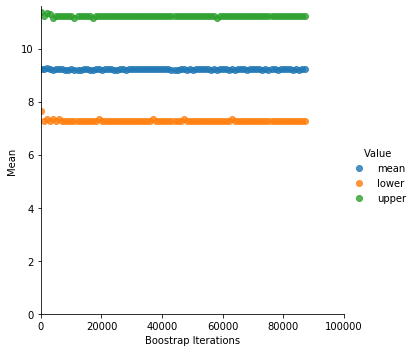

In [76]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_95.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_95.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	new_samples=np.random.choice(sample,(iterations,sample_size))
	data_mean=new_samples.mean()
	sample_means=np.array([])
	for row in new_samples:
		sample_means=np.append(sample_means,row.mean())
	sample_means=np.sort(sample_means)
	limit=(100-ci)/2
	lower=np.percentile(sample_means,limit)
	upper=np.percentile(sample_means,100-limit)
	return data_mean, lower, upper

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

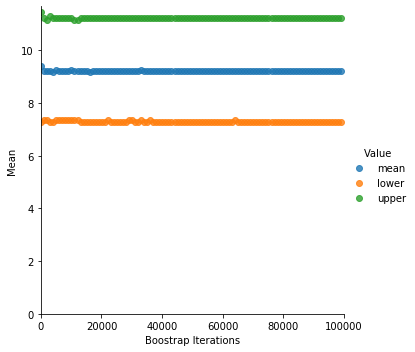

In [79]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [80]:
# Load and visualise the vehicles dataset
# Note: you can add more cells as needed to organise your code and your plots

df=pd.read_csv("vehicles.csv")
df.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


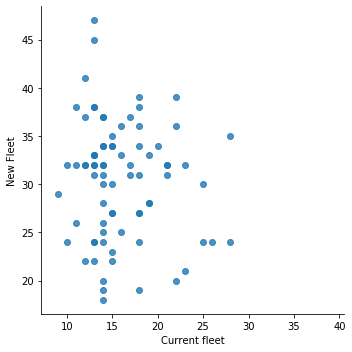

In [81]:
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=False)

Text(0.5, 1.0, 'Current Fleet')

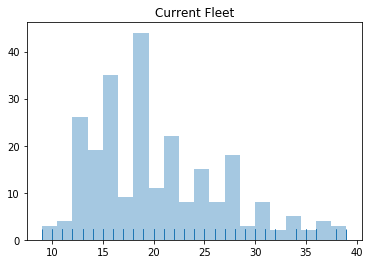

In [89]:
data = df[df.columns[0]].values
sns.distplot(data, bins=20,kde=False, rug=True).set_title("Current Fleet")

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'New fleet')

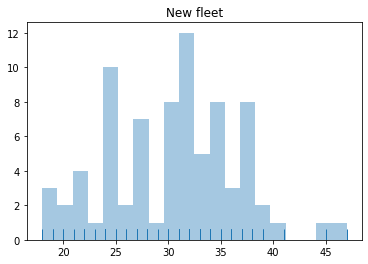

In [90]:
data = df[df.columns[1]].values
sns.distplot(data, bins=20,kde=False, rug=True).set_title("New fleet")

In [0]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
data_current_fleet=np.array(df[df.columns[0]].values)
data_new_fleet=np.array(df[df.columns[1]].dropna().values)
mean_current=data_current_fleet.mean()
mean_new=data_new_fleet.mean()
t_obs=mean_new-mean_current


In [147]:
p_val=calc_pvalue(50000,data_current_fleet,data_new_fleet,t_obs)
print(p_val)

0.0


In [149]:
old = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
new = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])
mean_current=old.mean()
mean_new=new.mean()
t_obs=mean_new-mean_current
p_val=calc_pvalue(20000,old,new,t_obs)
print(p_val)

0.03245
